In [1]:
#####################################################################################################################################
#Vamos a crear un clasificador de tipos de carnes que se utiliza en la industria real. Es un ejemplo simplificado, el modelo
#real utiliza imágenes de mayor resolución y el conjunto de entrenamiento es mucho mayor (requiriendo días para su entrenamiento).
#Pero para practicar, con esta pequeña muestra nos  sirve.
#El link para la descarga es: https://drive.google.com/file/d/1Z5DJ-MVS1TQV1kow9mIFWTec-ZdOLRLF/view?usp=sharing
#D E S A R R O L L O
#Al revisar el dataset vemos que estan las con nombres CLASE_01...CLASE_08; lo que se hizo es tan solo renombrar las carpetas del 0
#al 7 con ello tenemos las 8 clases de carnes con números enteros para facilitar el proceso.
#Se detecta que la CLASE_01 = 0 no existe una muestra y se procede a elegir una al azar y se gira la imágen 90 grados para tener al menos
#una muestra de esa clase muy diferente al resto.
#
#Luego de realizar varios ajustes al modelo como es el numero de capas, epocas y lotes, ejecutamos el modelo y nos dió el resultado:
#       Test loss: 1.892393708229065
#       Test accuracy: 0.8888888955116272
#       -------------------------------
#       Train loss: 1.684800148010254
#       Train accuracy: 0.9547123908996582
#

#Cargamos las librerias necesarias para este ejercicio
import os
from skimage.io import imread
from skimage.io import imshow
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# Directorio que contiene las imágenes TRAIN de carne, cada carpeta esta numerada con su clase así: 0,1,2,3,4...7
directorio = "./train"

# Listas para almacenar las imágenes y las etiquetas
imagenes = []
etiquetas = []

# Recorre todas las subcarpetas en el directorio
for clase in os.listdir(directorio):
    clase_path = os.path.join(directorio, clase)
    if os.path.isdir(clase_path):
        # Recorre todas las imágenes en la subcarpeta
        for imagen_nombre in os.listdir(clase_path):
            # Carga la imagen y redimensiona a un tamaño específico (por ejemplo, 128x128)
            imagen_path = os.path.join(clase_path, imagen_nombre)
            imagen = imread(imagen_path)
            imagen = resize(imagen, (216, 216))
            # Añade la imagen transformada y la etiqueta a las listas
            imagenes.append(imagen)
            etiquetas.append(clase)

# Convierte las listas en matrices numpy
X_train = np.array(imagenes)
y_train = np.array(etiquetas)

# Verifica las formas de las matrices
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)


Forma de X_train: (1634, 216, 216, 3)
Forma de y_train: (1634,)


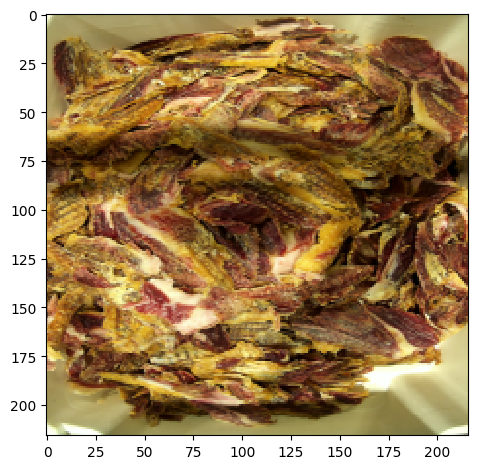

In [3]:
#Un ejemplo de la imagen cualquiera para visualizarla a color RGB
imshow(X_train[0])

In [4]:
#De y_train convertimos la variable de texto en entero
y_train = y_train.astype(int)
y_train

array([0, 1, 1, ..., 7, 7, 7])

In [5]:
# Directorio que contiene las imágenes TEST de carne, cada carpeta esta numerada con su clase así: 0,1,2,3,4...7
directorio = "./test"

# Listas para almacenar las imágenes y las etiquetas
imagenes = []
etiquetas = []

# Recorre todas las subcarpetas en el directorio
for clase in os.listdir(directorio):
    clase_path = os.path.join(directorio, clase)
    if os.path.isdir(clase_path):
        # Recorre todas las imágenes en la subcarpeta
        for imagen_nombre in os.listdir(clase_path):
            # Carga la imagen y redimensiona a un tamaño específico (por ejemplo, 128x128)
            imagen_path = os.path.join(clase_path, imagen_nombre)
            imagen = imread(imagen_path)
            imagen = resize(imagen, (216, 216))
            # Añade la imagen transformada y la etiqueta a las listas
            imagenes.append(imagen)
            etiquetas.append(clase)

# Convierte las listas en matrices numpy
X_test = np.array(imagenes)
y_test = np.array(etiquetas)

# Verifica las formas de las matrices
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_test: (810, 216, 216, 3)
Forma de y_test: (810,)


In [6]:
#De y_test convertimos la variable de texto en entero
y_test = y_test.astype(int)
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [7]:
# Definir el modelo de la CNN
modelo_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(216, 216, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(8, activation='softmax')  # 8 clases de carne
])

In [8]:
#Capas y parámetros del modelo creado
modelo_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 214, 214, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 107, 107, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 105, 105, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 52, 52, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 64)        0

In [9]:
# Compilar el modelo
modelo_cnn.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [10]:
# Entrenar el modelo
modelo_cnn.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1, validation_split=0.08)

Epoch 1/25


47/47 [==============================] - 32s 638ms/step - loss: 1.1657 - accuracy: 0.6487 - val_loss: 5.2829 - val_accuracy: 0.0000e+00
Epoch 2/25
47/47 [==============================] - 14s 303ms/step - loss: 0.5194 - accuracy: 0.7997 - val_loss: 6.6592 - val_accuracy: 0.5115
Epoch 3/25
47/47 [==============================] - 15s 322ms/step - loss: 0.4163 - accuracy: 0.8443 - val_loss: 7.1037 - val_accuracy: 0.1832
Epoch 4/25
47/47 [==============================] - 15s 317ms/step - loss: 0.2722 - accuracy: 0.9042 - val_loss: 10.6658 - val_accuracy: 0.2366
Epoch 5/25
47/47 [==============================] - 15s 317ms/step - loss: 0.1709 - accuracy: 0.9468 - val_loss: 11.5667 - val_accuracy: 0.4046
Epoch 6/25
47/47 [==============================] - 15s 320ms/step - loss: 0.1125 - accuracy: 0.9634 - val_loss: 12.5479 - val_accuracy: 0.2977
Epoch 7/25
47/47 [==============================] - 15s 322ms/step - loss: 0.0810 - accuracy: 0.9747 - val_loss: 11.2703 - val_accura

In [11]:
# Evaluar el modelo en el conjunto de prueba (TEST)
score_test = modelo_cnn.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score_test[0])
print("Test accuracy:", score_test[1])
print('-------------------------------')
score_train = modelo_cnn.evaluate(X_train, y_train, verbose=0)
print("Train loss:", score_train[0])
print("Train accuracy:", score_train[1])

Test loss: 1.892393708229065
Test accuracy: 0.8888888955116272
-------------------------------
Train loss: 1.684800148010254
Train accuracy: 0.9547123908996582


In [12]:
####################################################
# Predecimos las etiquetas para el conjunto de TEST#
####################################################
#                                                  #
y_pred = np.argmax(modelo_cnn.predict(X_test), axis=-1)

26/26 [==============================] - 3s 79ms/step


In [13]:
# Generar la matriz de confusión de TEST
conf_matrix = confusion_matrix(y_test, y_pred)

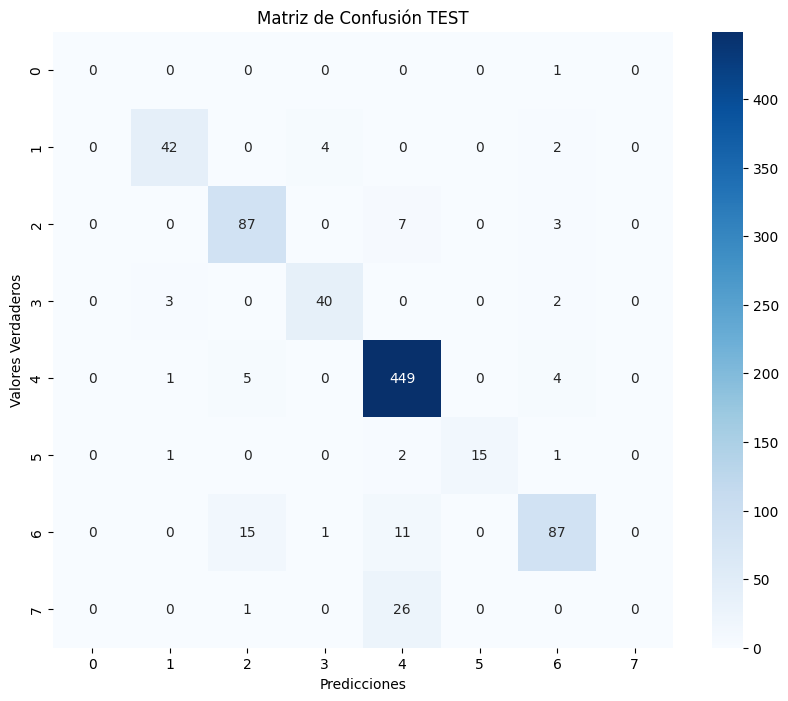

In [14]:
#Etiquetas para los ejes de la matriz de confusión
#Tenemos clase de carne 0, 1, 2, 3, 4, 5, 6, 7; total 8 clases de carne
# Mostramos la matriz de confusión de TEST con anotaciones de aciertos y fallos
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusión TEST')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

In [15]:
#Reporte de clasificación para análisis de TEST
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      0.88      0.88        48
           2       0.81      0.90      0.85        97
           3       0.89      0.89      0.89        45
           4       0.91      0.98      0.94       459
           5       1.00      0.79      0.88        19
           6       0.87      0.76      0.81       114
           7       0.00      0.00      0.00        27

    accuracy                           0.89       810
   macro avg       0.67      0.65      0.66       810
weighted avg       0.86      0.89      0.87       810



c:\Users\Sistemas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sistemas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sistemas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [16]:
#####################################################
# Predecimos las etiquetas para el conjunto de TRAIN#
#####################################################
#                                                   #
y_pred = np.argmax(modelo_cnn.predict(X_train), axis=-1)

52/52 [==============================] - 5s 93ms/step


In [17]:
# Generar la matriz de confusión de TRAIN
conf_matrix = confusion_matrix(y_train, y_pred)

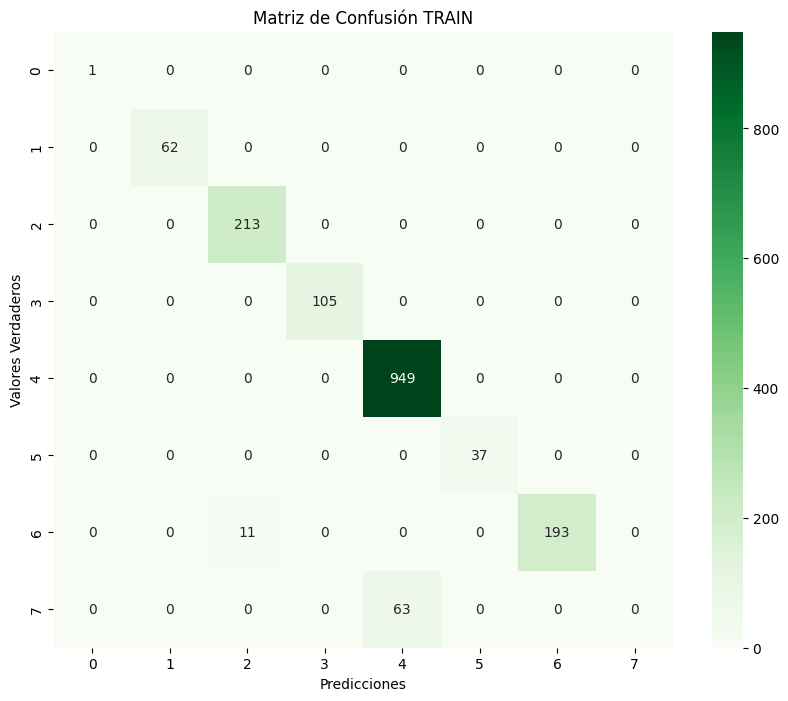

In [18]:
# Mostramos la matriz de confusión de TRAIN con anotaciones de aciertos y fallos
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.title('Matriz de Confusión TRAIN')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

In [19]:
#Reporte de clasificación para análisis de TRAIN
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        62
           2       0.95      1.00      0.97       213
           3       1.00      1.00      1.00       105
           4       0.94      1.00      0.97       949
           5       1.00      1.00      1.00        37
           6       1.00      0.95      0.97       204
           7       0.00      0.00      0.00        63

    accuracy                           0.95      1634
   macro avg       0.86      0.87      0.86      1634
weighted avg       0.92      0.95      0.94      1634



c:\Users\Sistemas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sistemas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sistemas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf